In [98]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 
sns.set(style="ticks")
import re
import nltk
from nltk.corpus import stopwords
import pymorphy2
from IPython.display import Image

In [99]:
#!pip install pymorphy2

In [100]:
import sys

In [101]:
sys.version

'3.9.12 (main, Apr  4 2022, 05:22:27) [MSC v.1916 64 bit (AMD64)]'

### Загрузка и первичный анализ данных

Используем данные с сайта Book24

In [102]:
data = pd.read_csv('data/datanorepeat.csv')

In [103]:
data.shape

(12082, 10)

In [104]:
data.dtypes

name            object
author          object
section         object
publish         object
age             object
year           float64
pages          float64
rating          object
cove            object
description     object
dtype: object

In [105]:
data.isnull().sum()

name              1
author         1382
section           0
publish        1496
age             321
year            196
pages           278
rating            0
cove              0
description      22
dtype: int64

In [106]:
test= data.author.fillna(0)


In [107]:
test[11000:11100]

11000    Доценко Виктор Николаевич
11001         Герберт Джордж Уэллс
11002            Виктория Токарева
11003                    Жорж Санд
11004                            0
                   ...            
11095                Михаил Михеев
11096                   Влад Савин
11097              Кристофер Прист
11098                   Юрий Буйда
11099             Виктория Платова
Name: author, Length: 100, dtype: object

Удалим "ненужные" книги

In [108]:
data7 = data
data7.shape

(12082, 10)

In [109]:
data7 = data7.dropna()

In [110]:
data7.isnull().sum()

name           0
author         0
section        0
publish        0
age            0
year           0
pages          0
rating         0
cove           0
description    0
dtype: int64

In [111]:
data7.shape

(9792, 10)

In [112]:
data = data7

In [113]:
list = data['section'].unique()
delete = []
for i in range(data['section'].unique().shape[0]):
    if data[(data.section == list[i])].shape[0] < 5:
        delete.append(list[i])
list = ['NaN', 'Книги на английском языке', 'Артбуки', 'Восточная философия', 'Книги на других языках', 
        'Биографии. Мемуары', 'Книги на немецком языке', 'Пословицы и поговорки', 'Деятели культуры и искусства',
        'Книги на французском языке', 'Проза', 'Зарубежный юмор', 'Поэзия', 'Стимпанк', 'Манга', 'Классическая поэзия', 
        'Популярная психология', 'Комиксы', 'Современная поэзия', 'Афоризмы']
for i in range(len(list)):
    delete.append(list[i])

In [114]:
len(delete)

63

In [115]:
for i in range(len(delete)):
    list = data[(data.section == delete[i])].index
    data = data.drop(index=list)
data.shape

(9070, 10)

In [116]:
data['section'].unique().shape[0]

68

In [117]:
data['section'].unique()

array(['Новеллизации', 'Современные любовные романы',
       'Социальная фантастика', 'Зарубежные детективы', 'Антиутопия',
       'Русское фэнтези', 'Классическая зарубежная литература',
       'Любовное фэнтези', 'Зарубежное фэнтези',
       'Современная зарубежная проза', 'Русская сентиментальная проза',
       'Героическое фэнтези', 'Современная русская проза', 'Триллеры',
       'Книги про вампиров', 'Историческая проза',
       'Классическая русская литература', 'Героическая фантастика',
       'Зарубежные любовные романы', 'Научная фантастика',
       'Зарубежная сентиментальная проза',
       'Фантастика и фэнтези для подростков',
       'Остросюжетные любовные романы', 'Ужасы. Мистика', 'Киберпанк',
       'Классические детективы', 'Зарубежная фантастика',
       'Боевая фантастика', 'Городское фэнтези', 'Юмористическое фэнтези',
       'Комиксы для детей', 'Постапокалипсис', 'Темное фэнтези',
       'Космическая фантастика', 'Графические романы',
       'Интеллектуальная проз

In [118]:
data.head()

,name,author,section,publish,age,year,pages,rating,cove,description
0,Благословение небожителей. Том 2,Тунсю Мосян,Новеллизации,Эксмо,18+,2022.0,432.0,5,https://ndc.book24.ru/resize/410x590/iblock/a5...,"Всё в этом мире имеет счёт: и удача, и невезен..."
1,Благословение небожителей. Том 1,Тунсю Мосян,Новеллизации,Эксмо,16+,2022.0,416.0,"4,9",https://ndc.book24.ru/resize/410x590/iblock/ac...,В незапамятные времена Се Лянь был наследным п...
2,Лето в пионерском галстуке,Сильванова Катерина,Современные любовные романы,Popcorn Books,18+,2021.0,544.0,"4,9",https://ndc.book24.ru/resize/410x590/iblock/25...,Юра возвращается в пионерский лагерь своей юно...
3,Электрошок. Внезапно,Сергей Тармашев,Социальная фантастика,АСТ,16+,2022.0,352.0,5,https:https://cdn.book24.ru/v2/ASE000000000863...,Новая книга от автора культовых циклов «Древни...
4,Билли Саммерс,Стивен Кинг,Зарубежные детективы,АСТ,16+,2022.0,544.0,"4,4",https://ndc.book24.ru/resize/410x590/iblock/a2...,Новый увлекательный роман от автора культовых ...


In [119]:
data.iloc[42]

name                                        Чудовище и чудовища 
author                                          Барбара Морриган
section                                       Зарубежное фэнтези
publish                                                    Эксмо
age                                                         18+ 
year                                                      2020.0
pages                                                      448.0
rating                                                      4,4 
cove           https:https://cdn.book24.ru/v2/ITD000000001045...
description    Такута — патологоанатом. Неплохая профессия дл...
Name: 43, dtype: object

In [120]:
data.shape

(9070, 10)

In [121]:
#data.to_csv(r'C:\Users\kenia\Thesis\data\dataclean.csv', index=False)

### Гистограммы по признакам

In [122]:
data = pd.read_csv('data/dataclean.csv')

<AxesSubplot:>

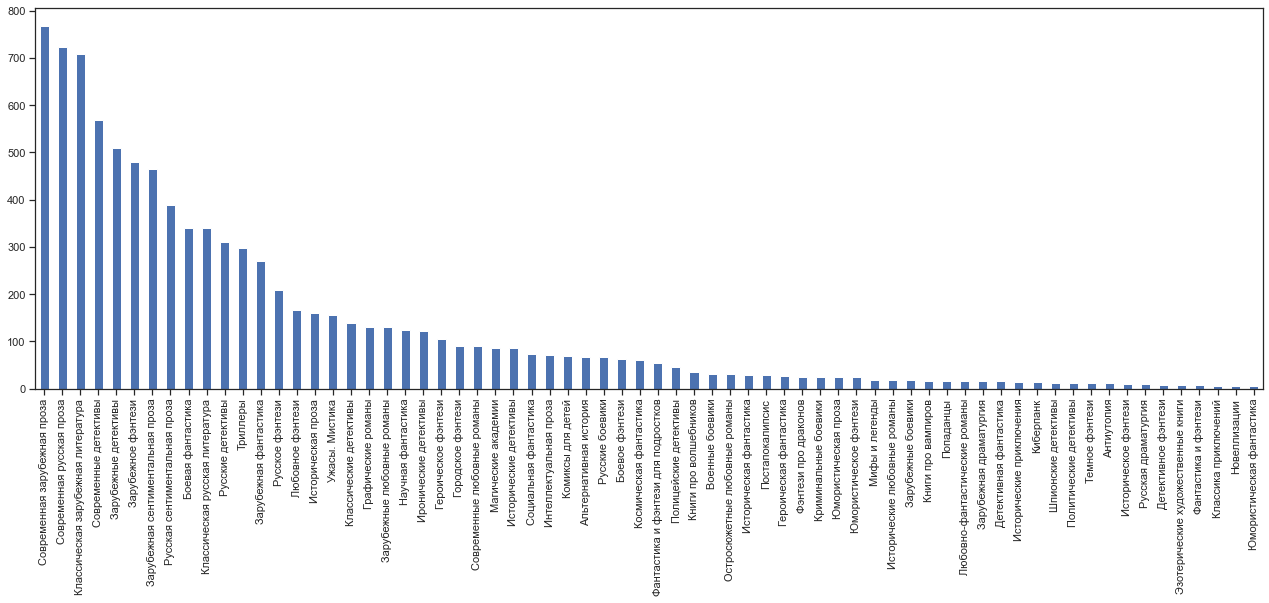

In [123]:
# Genre distribution
data['section'].value_counts().plot(x ='count', y = 'section', kind = 'bar', figsize = (22,7))

In [124]:
data.shape

(9070, 10)

In [125]:
data.shape[0]

9070

In [126]:
data.author[1]

'Тунсю Мосян'

In [127]:
re.sub(" ","", data.author[1])

'ТунсюМосян'

In [128]:
author_new = []
for i in data.index:
    author_new.append(re.sub(" ","", data.author[i]))

In [129]:
len(data.index)

9070

In [130]:
'''
publish_new = []
for i in data.index:
    publish_new.append(re.sub(" ","", data.publish[i]))
'''

'\npublish_new = []\nfor i in data.index:\n    publish_new.append(re.sub(" ","", data.publish[i]))\n'

In [131]:
description_new = []
for i in data.index:
    description_new.append(data.description[i])
for i in range(len(description_new)):
    description_new[i] = re.sub("[^А-Яа-я, ё, \n, -]", "", description_new[i])
    description_new[i] = description_new[i].lower()
    description_new[i] = re.sub(",", "", description_new[i])
    description_new[i] = re.sub("\n", " ", description_new[i])

In [132]:
data.description[9]

'Первый роман молодой американской писательницы Ли Бардуго «Тень и кость» вышел в 2012 году и сразу же пополнил ряды бестселлеров «New York Times»: вселенная магов-гришей моментально покорила сердца читателей! Абсолютно новый мир, продуманный до мелочей и наполненный мистикой и жестокой борьбой за власть, можно сравнить разве что с «Игрой престолов». Изданные в 2013 и 2014 годах продолжения цикла также стали хитами  продаж и окончательно утвердили Бардуго в статусе автора одной из самых  ярких фэнтези-эпопей десятилетия. Права на экранизацию купила студия DreamWorks, и, возможно, в ближайшем будущем  образы главных героев трилогии  воплотят на экране лучшие голливудские актеры!  «Шестерка воронов» - следующая глава в истории этого мира. Судьба  и будущее могущественной нации гришей внезапно оказывается в руках  хладнокровного бандита Каза Бреккера и его команды. Кто они? У каждого из них свои секреты, которые они тщательно оберегают даже друг от друга... Их ждут опасные приключения, го

In [133]:
description_new[9]

'первый роман молодой американской писательницы ли бардуго тень и кость вышел в  году и сразу же пополнил ряды бестселлеров    вселенная магов-гришей моментально покорила сердца читателей абсолютно новый мир продуманный до мелочей и наполненный мистикой и жестокой борьбой за власть можно сравнить разве что с игрой престолов изданные в  и  годах продолжения цикла также стали хитами  продаж и окончательно утвердили бардуго в статусе автора одной из самых  ярких фэнтези-эпопей десятилетия права на экранизацию купила студия  и возможно в ближайшем будущем  образы главных героев трилогии  воплотят на экране лучшие голливудские актеры  шестерка воронов - следующая глава в истории этого мира судьба  и будущее могущественной нации гришей внезапно оказывается в руках  хладнокровного бандита каза бреккера и его команды кто они у каждого из них свои секреты которые они тщательно оберегают даже друг от друга их ждут опасные приключения головокружительные пейзажи жуткие монстры и древняя магия всел

In [134]:
data['tags'] = data.apply(lambda _: '', axis=1)

In [135]:
description_new = pd.DataFrame(description_new)

In [136]:
#publish_new = pd.DataFrame(publish_new)

In [137]:
data['foo'] = data.apply(lambda _: ' ', axis=1)

#### Pymorphy2 - приведение к начальной форме с леммотизацией

In [138]:
morph = pymorphy2.MorphAnalyzer()

In [139]:
def parse(text):
    y = []
    
    for i in text.split():
        y.append(morph.parse(i)[0].normal_form)
        
    return " ".join(y)

In [140]:
morph.parse('возвращается')[0].normal_form

'возвращаться'

In [141]:
description_new[0][9]

'первый роман молодой американской писательницы ли бардуго тень и кость вышел в  году и сразу же пополнил ряды бестселлеров    вселенная магов-гришей моментально покорила сердца читателей абсолютно новый мир продуманный до мелочей и наполненный мистикой и жестокой борьбой за власть можно сравнить разве что с игрой престолов изданные в  и  годах продолжения цикла также стали хитами  продаж и окончательно утвердили бардуго в статусе автора одной из самых  ярких фэнтези-эпопей десятилетия права на экранизацию купила студия  и возможно в ближайшем будущем  образы главных героев трилогии  воплотят на экране лучшие голливудские актеры  шестерка воронов - следующая глава в истории этого мира судьба  и будущее могущественной нации гришей внезапно оказывается в руках  хладнокровного бандита каза бреккера и его команды кто они у каждого из них свои секреты которые они тщательно оберегают даже друг от друга их ждут опасные приключения головокружительные пейзажи жуткие монстры и древняя магия всел

In [142]:
parse('шестерка воронов - следующая глава в истории этого мира судьба  и будущее могущественной нации гришей внезапно оказывается в руках  хладнокровного бандита каза бреккера и его команды')

'шестёрка воронов - следующий глава в история это мир судьба и будущее могущественный нация гриша внезапно оказываться в рука хладнокровный бандит каз бреккер и он команда'

In [ ]:
abc = []
for i in range(len(description_new[0])):
    abc.append(parse(description_new[0][i]))

In [ ]:
abc

In [ ]:
abc[9]

In [ ]:
for i in range(len(description_new[0])):
    description_new[0][i] = abc[i]

In [ ]:
data['tags'] = description_new[0] + data['foo'] + data['section'] #+ publish_new[0] 

In [ ]:
data.head()

In [ ]:
data[7220:]

In [ ]:
data.tags[0]

#### выгружаем

In [ ]:
new_df = data[['name', 'tags']]
new_df

### Research

In [59]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(encoding='utf-8',stop_words=stopwords.words("russian"))

In [60]:
vectors = cv.fit_transform(data['tags'].values.astype('U')).toarray()

In [61]:
vectors

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [62]:
vectors[0]

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [63]:
cv.get_feature_names()

['000',
 '000экземпляр',
 '006',
 '10',
 '100',
 '1000',
 '100000',
 '1001',
 '100ть',
 '102',
 '103',
 '1048',
 '105251танк',
 '108',
 '108ть',
 '1099',
 '10быть',
 '10го',
 '10идеальный',
 '10й',
 '10летие',
 '10летний',
 '10я',
 '11',
 '110',
 '112263',
 '1127',
 '1137',
 '114',
 '1147',
 '1148',
 '1150',
 '116',
 '1164',
 '117',
 '1185',
 '11го',
 '11й',
 '11летний',
 '11я',
 '12',
 '120',
 '121',
 '122',
 '1235',
 '125',
 '127',
 '1270',
 '12й',
 '12летний',
 '12я',
 '13',
 '130',
 '1300',
 '1307',
 '1314',
 '133',
 '1346',
 '1348',
 '1356',
 '1395',
 '13летний',
 '14',
 '140',
 '1408пять',
 '1409',
 '1453',
 '1470ха',
 '1471',
 '1499',
 '14летний',
 '15',
 '150',
 '1500',
 '1500000',
 '1511',
 '1517',
 '1520',
 '152мма',
 '1537',
 '1541',
 '1542',
 '155',
 '1558',
 '1580ха',
 '1590',
 '15е',
 '15й',
 '15летний',
 '16',
 '160',
 '1600',
 '1606',
 '160летний',
 '1612',
 '1617',
 '1617м',
 '1620',
 '1626',
 '1630',
 '165',
 '1652',
 '1666',
 '16671745',
 '1692',
 '1699',
 '16й',
 '1

In [64]:
len(cv.get_feature_names())

45636

In [65]:
from sklearn.metrics.pairwise import cosine_similarity

In [66]:
similarity = cosine_similarity(vectors)

In [67]:
similarity

array([[1.        , 0.235725  , 0.14896906, ..., 0.        , 0.        ,
        0.        ],
       [0.235725  , 1.        , 0.13054598, ..., 0.        , 0.        ,
        0.        ],
       [0.14896906, 0.13054598, 1.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 1.        , 1.        ,
        1.        ],
       [0.        , 0.        , 0.        , ..., 1.        , 1.        ,
        1.        ],
       [0.        , 0.        , 0.        , ..., 1.        , 1.        ,
        1.        ]])

In [68]:
similarity[0]

array([1.        , 0.235725  , 0.14896906, ..., 0.        , 0.        ,
       0.        ])

In [69]:
type(similarity)

numpy.ndarray

In [70]:
list(zip(list(range(len(similarity[0].tolist()))),similarity[0].tolist()))

TypeError: 'Int64Index' object is not callable

In [72]:
a = [1,2,3,4,5,6,7,8,9]
a

[1, 2, 3, 4, 5, 6, 7, 8, 9]

In [73]:
enumerate(a)

In [74]:
list(enumerate(a))

TypeError: 'Int64Index' object is not callable

In [ ]:
list(enumerate(similarity[0]))

In [ ]:
sorted(similarity[0],reverse=True)

In [ ]:
opop = data[data['name'] == 'Благословение небожителей. Том 2 '].index[0]

In [ ]:
def recommend(rusbook):
    rusbook_index = str(data[data['name'] == rusbook].index[0])
    distances = similarity[rusbook_index]
    rusbook_list = sorted(list(enumerate(distances)),reverse=True,key=lambda x:x[1])[1:6]
    
    for i in rusbook_list:
        print(data.iloc[i[0]].name)

In [ ]:
recommend('Благословение небожителей. Том 2 ')

In [ ]:
import pickle

In [ ]:
pickle.dump(data.to_dict(),open('books_dict.pkl','wb'))

In [ ]:
pickle.dump(similarity,open('similarity.pkl','wb'))

In [ ]:
data['name'].values

In [ ]:
dickdata = data.to_dict()

In [ ]:
datata = pd.DataFrame(dickdata)

In [ ]:
datata

In [ ]:
data.iloc[5112].name

In [ ]:
data.name[6205]

In [ ]:
data.cove[5]

In [ ]:
data.cove[5][6:]

In [ ]:
data.cove[5][:11] == 'https:https'

In [ ]:
Image(url= data.cove[4])

In [ ]:
"https://cdn.book24.ru/v2/ASE000000000863181/COVER/cover13d__w410.jpg" 

In [ ]:
datata.index[99]

In [ ]:
datata.index[]

In [ ]:
select_ind = datata[datata['name'] == 'Тень и кость '].index[0]

In [ ]:
datata.cove[select_ind]